# File-ok kezelése
![c](http://sd.keepcalm-o-matic.co.uk/i-w600/keep-calm-and-save-the-data-file.jpg)

Nagy mennyiségű adatok feldolgozásánál elengedhetetlen dolog a számítógépek memóriáján (RAM) kívül a külső tárolókon (merevlemezek, egyéb adathordozók) tárolt file-ok használata is. Az alábbiakban a `python` alapértelmezett filekezelő függvényeivel ismerkedünk meg először, majd a `numpy` csomag filekezelő rutinjaival barátkozunk meg, végül néhány tudományos kutatásokban használt formátumot (hdf5 és fits) kezelő függvényt mutatunk be.
A notebookot - mint mindig - most is kezdjük a már megszokott sorral:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

## A python beépített filekezelő függvényei

Ebben a fejezetben a `python` egyéb moduloktól független, alapvető fileműveleteket biztosító függvényeivel fogunk megismerkedni. Ezen függvények egy file tartalmát többnyire karakterláncok formájában kezelik, ezért konkrét formátumú adatok beolvasása, illetve kiírása némi bonyodalommal jár, melyeket legtöbbször valamilyen specifikusan az adott feladatra megírt függvény tesz lehetővé. Az alábbi részben a történelmi napfoltszám-megfigyelések [adatainak](http://www.sidc.be/silso/datafiles) az elemzésén keresztül ismerkedünk meg ezekkel a függvényekkel. 

### File-ok beolvasása

Egész file beolvasása egyetlen karakterláncba az alábbiak szerint történik. 

Előszöris az `open()` függvény segítségével megnyitjuk a beolvasni kívánt file-t. Az `open()` függvény egy előkészítő függvény, amely arra készíti fel a rendszert, hogy az adott merevelemezen (vagy más adattárolón) fellelhető file-lal dolgozni tudjunk. Legegyszerűbb esetben ez a file nevének a megadásával történik.

In [2]:
file1 = open('data/SN_m_tot_V2.0.txt')

In [3]:
file1

<_io.TextIOWrapper name='data/SN_m_tot_V2.0.txt' mode='r' encoding='UTF-8'>

A fenti kódsor hatására a `file1` változón keresztül férhetünk hozzá a file tartalmához. A file teljes tartalmát például a következő utasítással tölthetjük be egy karakterlánc formájában az `egeszfile` változóba:

In [4]:
egeszfile=file1.read()

Figyelem, ne keverjük össze a `file1` és az `egeszfile` változókat! Amint azt fent is említettük, az `egeszfile` egy karakterlánc, a `file1` pedig a file-ból való olvasást, illetve a file-ba való írást segítő segédobjektum, amelyet szokás esetenként (adat)folyam-nak vagy angolul streamnek is nevezni.

Ha már minden olvasás és írás befejeződött, akkor a `close()` utasítással zárhatjuk be a folyamot, azaz ez a parancs szakítja meg a kommunikációt az adattárolóval.

In [5]:
print(file1.closed)
file1.close()
print(file1.closed)

False
True


Mivel fent betöltöttük a file tartalmát az `egeszfile` stringbe, ezért ennek segítségével bele is pillanthatunk, vizsgáljuk meg például az első 100 karaktert a file-ból:

In [6]:
egeszfile[:100]

'#1. oszlop ev  ho  T[ev]  napfolt_szam\n#2. oszlop honap\n#3. oszlop az ido evben merve \n#4. oszlop Na'

Ha megnézzük magát a [file](data/SN_m_tot_V2.0.txt)-t, akkor látható hogy tényleg ezek a dolgok vannak benne. Figyeljük meg hogy a sor vége helyett a `\n` karakter szerepel! 

A `read()` függvény előre specifikált számú karakter olvasását is lehetővé teszi. Nyissuk meg ismét az előző file-t ismét:

In [7]:
file1 = open('data/SN_m_tot_V2.0.txt')

Olvassunk be 10 karaktert a fileból az alábbi módon:

In [8]:
karakterek1=file1.read(10)

A `karakterek1` változó ezután a file első 10 karakterét tartalmazza (vessük össze ezt az `egeszfile[:100]` parancs kimenetével): 

In [9]:
karakterek1

'#1. oszlop'

Ha ismét meghívjuk a `file1` változó `read()` függvényét, akkor az a következő 10 karaktert olvassa be:

In [10]:
karakterek2=file1.read(10)

In [11]:
karakterek2

' ev  ho  T'

Látjuk tehát hogy a `read()` utasítás hatására könyörtelenül haladunk végig a file karakterein: úgy tűnhet, ha már egyszer valamit beolvastunk, akkor azt többé már nem tudjuk! Szerencsére ez nem így van, mivel a `tell()` és a `seek()` függvények segítségével kérdezhetjük le, illetve állíthatjuk be egy megnyitott filefolyam aktuális pozicióját.

A `tell()` függvényt alkalmazva a `file1` változóra megkaphatjuk az aktuális folyampoziciót. Ami a jelen esetben 20, hiszen az előző két read parancs 10 karaktert olvasott be!

In [12]:
file1.tell()

20

A `seek()` parancs segítségével a file egy tetszőleges helyére ugorhatunk. A `seek(n)` függvény alkalmazásával a file `n`-edik karakterére ugrunk. Ha ezután alkalmazzuk a `read()` függvényt, akkor a file tartalmát ettől a pozíciótól olvassuk.

In [13]:
file1.seek(5)

5

Az alábbi parancs tehát a 5. karaktertől olvas be újabb 10 darab karaktert. 

In [14]:
karakterek3=file1.read(10)

In [15]:
karakterek3

'szlop ev  '

Zárjuk ismét be a file-t!

In [16]:
file1.close()

Hogy véletlenül se felejtsük el bezárni a file-t pythonban van egy kényelmes/hasznos konstrukció a [`with`](https://docs.python.org/3/reference/compound_stmts.html#with) . Ez meghívja az adott objektum `__enter__()` es `__exit__()` tagfüggvényeit. A `with` block után a változó megmarad, de a file már zárva van.


A `with` előnyei:
- biztos nem felejtjük el bezárni a filet
- ha valami (i/o) hiba történik, a fájl akkor is bezáródik
- nyertünk egy sor kódot
- szinte biztos, hogy nem keverjük össze a különböző fájlokat,amibe írni akarunk  file1,file2,etc
- kizárólag ebben a blokkban tudunk a fájlba írni
    - rövid ideig van nyitva egy fájl, kevesebb az esélye, hogy több helyről van írva olvasva egyszerre
    - érthető a kódban, hogy mi hol történik

---

In [17]:
with open('data/SN_m_tot_V2.0.txt') as f:
    print(f.closed) # Itt még nyitva kell hogy legyen a file
print(f.closed) # Itt a with már bezárja nekünk

False
True


Nagyon sok esetben az adatfile-okban hordozott információ táblázatszerűen van rendezve. Az file minden sora hasonló tagolással csoportosítja a számunkra értékes adatokat. 
Egy megnyitott file minden sorát - mint soronkénti karakterláncok listáját - a readlines függvény segítségével gyárthatjuk le.

In [18]:
with open('data/SN_m_tot_V2.0.txt') as f:
    sorok = f.readlines()

A sorok lista minden eleme most tehát egy egy sor a file-ból, vizsgáljuk meg például az első 10 sort:

In [19]:
sorok[0:10]

['#1. oszlop ev  ho  T[ev]  napfolt_szam\n',
 '#2. oszlop honap\n',
 '#3. oszlop az ido evben merve \n',
 '#4. oszlop Napfoltok szamanak atlaga\n',
 '#5. oszlop Napfoltok szamanak szorasa, negativ ertekek azt jelentik hogy az informacio nem all rendelkezesre!\n',
 '#6. oszlop Napfolt meresek szama,      negativ ertekek azt jelentik hogy az informacio nem all rendelkezesre!\n',
 '1749 01 1749.042   96.7  -1.0    -1  \n',
 '1749 02 1749.123  104.3  -1.0    -1  \n',
 '1749 03 1749.204  116.7  -1.0    -1  \n',
 '1749 04 1749.288   92.8  -1.0    -1  \n']

Amint látjuk, az első hat sor a '#' karakterrel kezdődik, és minden ilyen sor azt mondja meg hogy a tényleges adatok megfelelő oszlopa mit tartalmaz. A hetedik sortól lefelé viszont szóközökkel elválasztott számok vannak, ez maga a hőn áhitott adat, de sajnos még mindig karakterláncok formájában! 

Az első értékes adatsor a file 7.-sora:

In [20]:
sorok[6]

'1749 01 1749.042   96.7  -1.0    -1  \n'

Egy karakterláncot a `split()` parancs segítségével adott karakterek mentén fel tudunk vágni egy listába. A `split()` parancs alapértelmezésben szóközök szerint vágja fel a megjelölt karakterláncot, így az első értékes adatsor oszlopokra szabása az alábbiak szerint történik:

In [21]:
sorok[6].split()

['1749', '01', '1749.042', '96.7', '-1.0', '-1']

Az eredmény tehát egy lista mely tartalmazza az értékes adatokat, ugyan még mindig karakterláncok formájában! 
Az egyes elemeket lebegőpontos számmá a már ismert `float()` függvénnyel konvertálhatjuk. Tehát az első adatsor negyedik oszlopából a következő módon készíthetünk hús-vér számot:

In [22]:
float(sorok[6].split()[3])

96.7

Ha már egy elemet számmá tudunk konvertálni, akkor egy `for` ciklus segítségével számokat tartalmazó listákba tudjuk rendezni az adatokat a már megszokott módon:

In [23]:
num_napfolt=[]
meresi_ido=[]
for sor in sorok[6:]:
    num_napfolt.append( float(sor.split()[3]) )
    meresi_ido.append(  float(sor.split()[2]) )

Ábrázoljuk végül a napfoltok számát az évek függvényében:

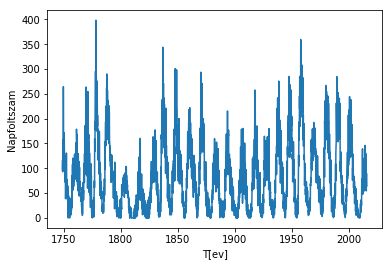

In [24]:
plot(meresi_ido,num_napfolt)
xlabel('T[ev]')
ylabel('Napfoltszam')

Jól látszik, hogy az elmúlt 250 év során a napfoltok száma periodikusan változik.

Nagy fájlok olvasása esetén nem érdemes, és néha nem is lehetséges, hogy egyszerre beolvassuk az egész fájlt a memóriába. Erre is van egy kényelmes megoldás a pythonban.

A nyitott fájlon egyszerűen végigiterálhatunk egy for ciklusban.

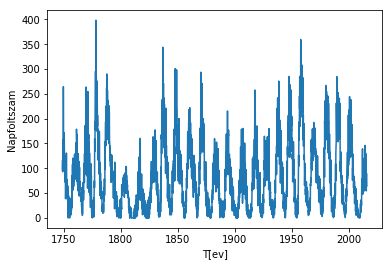

In [25]:
with open('data/SN_m_tot_V2.0.txt') as f:
    num_napfolt,meresi_ido=[],[]
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy fileon
        if sor[0]!='#':
            num_napfolt.append( float(sor.split()[3]) )
            meresi_ido.append(  float(sor.split()[2]) )
        
plot(meresi_ido,num_napfolt) # Ez az ábra ugyan az mint az előző
xlabel('T[ev]')
ylabel('Napfoltszam')

### Mentés

Az adatok beolvasása mellett sokszor lehet szükség a feldolgozott információ újbóli kiírására. Erre a `python` az adatfolyam típusú változókra alkalmazott `write()` függvényt kínálja. Vizsgáljuk meg, egy egyszerű példán, hogyan is működik a fileírás! 

Nyissunk meg egy file-t, amelybe írni szeretnénk, ezt az `open()` függvény `mode` kulcsszavas paraméterén keresztül tudjuk jelezni a `mode='w'` beállítással. Itt a `w` az írási módot jelenti.


A `file2` folyamba a `write()` függvény segítségével tudunk karakterláncokat írni:

In [26]:
with open('data/out_mentes1.dat',mode='w') as f:
    print(f)

<_io.TextIOWrapper name='data/out_mentes1.dat' mode='w' encoding='UTF-8'>


In [27]:
with open('data/out_mentes1.dat',mode='w') as f:
    print(f.write('#Ez az elso kiirt fileom!\n'))

26


Ha már meglévő file-hoz szeretnénk további karaktereket fűzni, akkor az `open()` függvény `mode` paraméterének `mode='a'` beállításával jelezzük ezt. Az `'a'` karakter itt az append angol szó rövidítése, mely ismerős lehet már számunkra egy, a listákra vonatkozó függvény nevéből.

In [28]:
with open('data/out_mentes1.dat',mode='a') as f:
     print(f)

<_io.TextIOWrapper name='data/out_mentes1.dat' mode='a' encoding='UTF-8'>


Írjuk ki a mérési idő (`meresi_ido`) és a napfoltok számát tartalmazó (`num_napfolt`) adatokat a már fent létrehozott `data/out_mentes1.dat` file-ba. 
Ezt egy `for` ciklus segítségével fogjuk megtenni:

In [29]:
with open('data/out_mentes1.dat',mode='a') as f:
    for i in range(len(meresi_ido)):
        f.write(str(meresi_ido[i])+' '+str(num_napfolt[i])+'\n')

A `write()` függvény hasába írt karakterlánc a `meresi_ido` és `num_napfolt` tömbök megfelelő sorában lévő elemet tartalmazza szóközzel elválasztva, illetve a sor végét egy sortörés `'\n'` -el jelezve.

A beolvasáshoz hasonlóan a kiíratásnál is van lehetőség egész sorok kiírására. Ezt, talán nem túl meglepő módon a `writelines()` függvény valósítja meg. Ez a függvény karakterláncok listáját írja ki egy file-ba egy megnyitott filefolyamon keresztül.  

Ha a lista minden karakterlánca `'\n'` karakterre végződik, akkor a kiíratás során a file-ban minden listaelem egy-egy külön sorba kerül:

In [30]:
sorok=['Ez az elso sor\n','Ez a masodik sor\n']
with open('data/out_mentes1.dat',mode='a') as f:
    f.writelines(sorok)

Mi történik, ha lemarad a `'\n'` ? 

In [31]:
sorok=['Ez az harmadik','Ez hova kerult?\n']
with open('data/out_mentes2.dat',mode='a') as f:
    f.writelines(sorok)

Vizsgáljuk meg magát a file-t!

Ha sorokat akarunk írni, és nem akarunk bajlódni a sorvége karakterek írásával, akkor egyszerűen a `print()` függvényt is használhajtuk a fájlba írásra.

In [32]:
sorok=['Ez az harmadik','Ez hova kerult?']
with open('data/out_mentes3.dat',mode='w') as f:
    for s in sorok:
        print(s,file=f)

### Különös karakterek karakterláncokban

A fentiekben már többször is találkoztunk a sortörést jelölő `'\n' ` karakterrel. Ehhez hasonlóan van néhány más úgynevezett [literális](https://docs.python.org/2.0/ref/strings.html) karakter, amelynek speciális jelentése van. Ezek közül az alábbi táblázatban összefoglalunk néhányat:


karakter |	jelentés
-|-
\n|	sortörés
\r|	kocsi vissza
\t|	vízszintes kihagyás (TAB)
\v| függőleges kihagyás (TAB)
\xhh..| hexadecimális karakter hh.. értékkel



A print függvény segítségével az alábbi példán demonstráljuk a `'\r'`, `'\t'`, és a már ismert `'\n'` hatását:

In [33]:
print("EZEK ITT NAGYBETUKezek itt kisbetuk")

EZEK ITT NAGYBETUKezek itt kisbetuk


In [34]:
print("EZEK ITT NAGYBETUK\rezek itt kisbetuk")

ezek itt kisbetuk


In [35]:
print("EZEK ITT NAGYBETUK\tezek itt kisbetuk")

EZEK ITT NAGYBETUK	ezek itt kisbetuk


In [36]:
print("EZEK ITT NAGYBETUK\nezek itt kisbetuk")

EZEK ITT NAGYBETUK
ezek itt kisbetuk


Ezek a karakterek file-ba való írás közben is hasonlóan viselkednek!

---

## Numpy filekezelő rutinok

Amint korábbiakban is láthattuk, a `numpy` csomag `array` típusú változói számos előnyös tulajdonsággal rendelkeznek a sima `list` típusú változókhoz képest. A `numpy` csomag biztosít néhány hasznos filekezelő rutint, melyek az `array` tipusú változók file-ba kiírására, illetve file-okból történő beolvasására használhatóak. Az alábbiakban két érdekes példán keresztül fogjuk megvizsgálni ezeket a függvényeket.
![Baumgartner Jump with data](http://img.youtube.com/vi/raiFrxbHxV0/0.jpg)

Elemezzük Felix Baumgartner [ugrásának](https://youtu.be/raiFrxbHxV0) adatait. Az ugrás megtett út-idő adatait a `data/h_vs_t` file-ban találjuk. (Vizsgáljuk meg magát a file-t is! ) A file két oszlopnyi számot tartalmaz. Az első oszlop az idő s-ban, a második oszlop az adott időben mért magasság m-ben. Ilyen jellegű egyszerű struktúrájú file-ok beolvasására és az adatok array-ba való töltésére a `numpy` csomag `loadtxt` függvényét használhatjuk:

In [37]:
baum_data=loadtxt('data/h_vs_t.txt')

A `baum_data` tömb első oszlopát a `t` változóba, a második oszlopát pedig a `h` változóba tároljuk:

In [38]:
t=baum_data[:,0] # idő
h=baum_data[:,1] # magasság

Ábrázoljuk az adatokat! A tengelyfeliratok természetesen nem maradhatnak el!

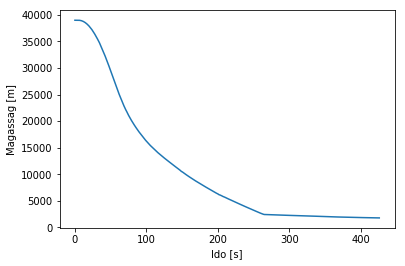

In [39]:
plot(t,h)
xlabel('Ido [s]')
ylabel('Magassag [m]')

Az ugrással kapcsolatban egy igen fontos kérdés volt, hogy vajon sikerült-e szabadesésben átlépni a hangsebességet? Vizsgáljuk meg, hogy ezen adatok alapján vajon átlépte-e Felix Baumgartner a hanghatárt! Először is szükség van a sebesség időfüggésére. Ezt a magasság$--$idő függvény numerikus deriváltjával fogjuk most meghatározni. 
Ha egy $y(x)$ függvényt mintavételezésével véges darab $x_i,y_i$ párt kapunk, akkor az $y(x)$ függvény numerikus deriváltját a következő differencia hányadossal közelíthetjük:


 $$\left . \frac{\mathrm{d}y}{\mathrm{d}x}\right|_{x_i} =\frac{y_{i+1}-y_i}{x_{i+1}-x_i} $$

Definiáljunk most egy függvényt, mely  két ugyanolyan hosszúságú  tömb `x` és `y` adataiból legenerálja a két tömb numerikus derviáltját. Figyeljük meg, hogy az utolsó és az első adatpontban a fenti képlettől egy kicsit eltérő módon járunk el.

In [40]:
# numerikus derivált függvény
def nderiv(y,x):
    "Első szomszéd differenciál"
    n = len(y) # adatpontok száma
    d = zeros(n) # változó inicializálás. A zeros() függvény tetszőleges alakú és 0-kat tartalmazó arrayt gyárt
    # mivel a legegyszerűbb numerikus differenciálás nem szimmetrikus a végpontokat
    # kicsit másképp kezeljük mint a tömb belsejében lévő pontokat
    for i in range(1,n-1):
        d[i] = (y[i+1]-y[i])/(x[i+1]-x[i])   #egy általános pont deriváltja
    d[0] = (y[1]-y[0])/(x[1]-x[0])           #az első pont deriváltja
    d[n-1] = (y[n-1]-y[n-2])/(x[n-1]-x[n-2]) # az utolsó pont deriváltja
    return d


Az nderiv függvény segítségével a sebesség meghatározható.

In [41]:
v=nderiv(h,t) # Figyelem az első változó a h a második a t!!!

Vizsgáljuk meg a sebesség-idő függvényt!

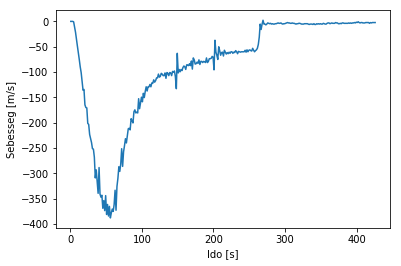

In [42]:
plot(t,v)
xlabel('Ido [s]')
ylabel('Sebesseg [m/s]')

Mivel általában a hang terjedési sebessége függ a magasságtól, ezért annak érdekében, hogy megtudjuk, hogy sikerült-e áttörni a hanghatárt, célszerű a sebességet a magasság függvényében ábrázolni:

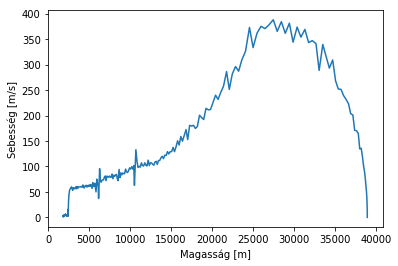

In [43]:
plot(h,abs(v))
xlabel('Magasság [m]')
ylabel('Sebesség [m/s]')

A wikipédián található [adatok](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Comparison_US_standard_atmosphere_1962.svg/2000px-Comparison_US_standard_atmosphere_1962.svg.png) alapján a hangsebesség 25km magasságban valamivel 300 m/s alatt van. Ezen a magasságon Felix sebessége 350 m/s körül mozgott, tehát a rekord - a mérési adatok alapján - sikerült!


A numpy savetxt függvényével írjuk ki az elkészített v-t adatokat. 

In [44]:
savetxt('data/out_tv.txt',[t,v])

Vizsgáljuk meg az elkészített [filet](data/out_tv.txt)!

---

## Numpy bináris I/O

Nagy tömbök kiíratása szöveges fájlokba nagyon lassú lehet. Ha nem merül fel, hogy ember is olvasni fogja a fájlt, amit lementünk, és nagyon fontos a gyors kiírás-beolvasás, érdemes lehet a numpy bináris save-load függvényeit használni. 

Csináljunk egy jó nagy tömböt.

In [45]:
#nagyobbacska tomb
a=random.random((2048,2048))

Írjuk ki szövegesen, és mérjük le mennyi időbe telik.

In [46]:
%time savetxt('data/out_tmp.txt',a)

CPU times: user 5.06 s, sys: 224 ms, total: 5.29 s
Wall time: 9.55 s


Írjuk ki binárisan. Ezt egyszerűen a `numpy` modul [`save`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) függvényével tehetjük meg mely változók bináris formátumba történő kiiratását teszi lehetővé. 

In [47]:
%time save('data/out_tmp.npy',a)

CPU times: user 0 ns, sys: 80 ms, total: 80 ms
Wall time: 2.45 s


Olvassuk be szövegesen.

In [48]:
%time a1=loadtxt('data/out_tmp.txt')

CPU times: user 11.5 s, sys: 380 ms, total: 11.9 s
Wall time: 11.9 s


Olvassuk be binárisan.

In [49]:
%time a2=load('data/out_tmp.npy')

CPU times: user 0 ns, sys: 12 ms, total: 12 ms
Wall time: 12.3 ms


Hasonlítsuk össze a két tömböt.

In [50]:
all(a1==a2)

True

Hasonlítsuk össze a fájlok méretét is!

In [51]:
! du -h data/out_tmp.txt

100M	data/out_tmp.txt


In [52]:
! du -h data/out_tmp.npy

33M	data/out_tmp.npy


Jól látszik tehát hogy akár több mint egy nagyságrendel gyorsabban történik a merevlemezre írás bináris formátumban illetve, hogy a bináris fileok mérete is kisebb mint a sima szöveges fileok mérete.

---

## Pickle,  mentsünk le bármit

Előfordulhat, hogy nem egy egyszerű táblázatot, vagy más fájlban könnyen reprezentálható dolgot akarunk lementeni. Ebben az esetben sem kell bonyolult kiírató, beolvasó függvényeket gyártani, hanem segítségünkre van a python beépített pickle csomagja, ami bármilyen python objektumot byte-okká tud alakítani és így le is tudja menteni egy fájlba.

Tegyük fel hogy le akarok menteni egy nagyon komplex számot, amin már nagyon sokat dolgoztam, de még egy picit kéne később.

In [53]:
class Complex:
    """
    Az en komplex szam osztalyom, mert a pythone bena.
    Igaz meg ezen is lehetne dologzni ...
    
    """
    def __init__(self,re,im):
        self.re,self.im=re,im
    
    def __add__(self,other):
        return Complex(self.re+other.re,self.im+other.im)
    
    def __mul__(self,other):
        re=self.re*other.re - self.im*other.im
        im=self.re*other.im + self.im*other.re
        return Complex(re,im)
    
    def __abs__(self):
        return (self.re**2 + self.im**2)**0.5
    
    def __str__(self):
         return str(self.re)+' + '+str(self.im)+'i'
    __repr__=__str__

In [54]:
z=Complex(3,4)
'teszt:',z,abs(z),z+z,z*z

('teszt:', 3 + 4i, 5.0, 6 + 8i, -7 + 24i)

In [55]:
import pickle #nem tul meglepő módon így töltjük be a pickle modult

Nyitunk egy fájlt és abba tudunk írni. A `pickle` csomagban a file-ba való írást a [`dump`](https://docs.python.org/3/library/pickle.html?highlight=dump#pickle.dump) függvénnyel tudjuk elvégezni.

In [56]:
with open("data/out_complex.pkl","wb") as f:
    pickle.dump(z,f)

Töltsük be. Ezt a `pickle`-modul [`load`](https://docs.python.org/3/library/pickle.html?highlight=dump#pickle.load) függvényével tesszük meg:

In [57]:
with open("data/out_complex.pkl","rb") as f:
    uj_z = pickle.load(f)

In [58]:
uj_z

3 + 4i

---

## Képek

Pythonban nagyon könnyen lehet képekkel is dolgozni. Most csak a legkézenfekvőbb matplotlib programokat nézzük meg, de rengeteg másik, komolyabb képmanipuláló csomag létezik pl.: [opencv](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html),[scikit-image](http://scikit-image.org/),[pillow](https://python-pillow.org/).

Betölteni képet legegyszerűbben a matplotlib.image.imread függvényel tudunk.

In [59]:
im=imread('data/Photo_51_x-ray_diffraction_image.jpg')

A betöltött kép már jól ismert numpy array lesz. 

In [60]:
type(im)

numpy.ndarray

A képet meg is nézhetem itt, más színekkel, skálával.

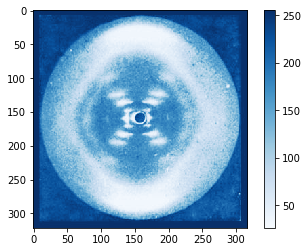

In [61]:
imshow(im[:,:,2],cmap='Blues') # a kek csatorna kekkel
colorbar() #skala

Képek manipulálásakor figyeljünk arra, hogy tipikusan uint8 típusú számokból állnak. Ezen válltozók értékei típus 8bit-en reprezentált egész számok, tehát a [0-255] intervallumból vett egész számok.

In [62]:
im.dtype

dtype('uint8')

Ha 255-höz hozzáadok egyet, akkor az nem 256!

In [63]:
im[0][0][0]

255

In [64]:
im[0][0][0]+=1
im[0][0][0]

0

Miután meghatároztuk a DNS térszerkezetét a fenti kék ábrából elmenthetjük a képet! A használt kiterjesztés implicit módon meghatározza a kép fomrátumát.

In [65]:
imsave('data/out_mentett_kep.jpg',im)  # így mentünk jpg-be
imsave('data/out_mentett_kep.png',im)  # így mentünk png-be
imsave('data/out_mentett_kep.tiff',im) # így mentünk tiff-be

# "Egzotikus" fájlok kezelése pythonban

## A hdf fájlok

A Hierarchical Data Format vagy röviden hdf, egy széles körben elterjedt formátum nagymennyiségű tudományos adatok tárolására, és megosztására. Két fontos verziója használatos, melyek nem igazán kompatibilisek. Itt a HDF5-ös fájlok megnyitásáról lesz szó, mely jelentősen egyszerűbb adatcsoportosítást használ az elődjénél (4-es verzió). 

A HDF5 fájlok esetében az értékes adatokat csoportokba, és alcsoportokba lehet rendezni, melyek között lehetőség van hivatkozásokat tenni. Úgy lehet elképzelni, mint egy kisebb fajta könyvtárszerkezetet, melyben szerteszét vannak az adatok.

![](http://neondataskills.org/images/HDf5/hdf5_structure4.jpg)


A HDF5 fájlok belső szerkezete két fő egységből építhető fel, mint ahogy az ábrán is látszik. Leíró részek azaz metadatok illetve maguk az adatok. Az adatokat többdimenziós adattáblákban tároljuk.

Maga a HDF5 fájl belső csoportosítása hasonlóan hívható meg, mint egy hagyományos könyvtárstruktúra. Itt is definiálva van a "root" csoport, aminek alcsoportjai vannak, melyeknek (mint a könyvtárainknak) neveket adjhatunk. Egy adott adattömb elérési útvonala: `/"csoportnév"/adatok`

A pythonban a hdf5 fájlokat a **h5py** csomag tudja legegyszerűbben beolvasni, így itt ennek a működését mutatjuk be.

In [66]:
import h5py

A `h5py.File` függvénnyel tudjuk a hdf5 állományokat megnyitni. Ebben a lépésben el kell dönteni, hogy olvasni, vagy írni szeretnénk  a fájlt (lehet mindkettő is). Olvasni például, hasonlóan a korábbiakhoz, a második argumentumban  megadott "r" opcióval lehet.

In [67]:
f = h5py.File("data/data.h5", "r")

Az  adat-könyvtár elemeinek a neveit például a `dict`-eknél megszokott `keys` metódus segítségével tudjuk lekérdezni. 

In [68]:
list(f.keys()) # ha nem rendezzük listába akkor nem írja ki szépen!

['data', 'data_descr']

a hierarchiában egy szintel lejjebb pedig ezek a kulcsok találhatóak:

In [69]:
list(f["data"].keys()) 

['data', 'data_indices', 'data_indptr', 'label']

Most nézzünk bele "data/data" csoportba, amiben a tényleges adatok szerepelnek: 

In [70]:
f["data/data"] # Ez már egy adattáblát rejt.

<HDF5 dataset "data": shape (451592,), type "<f8">

In [71]:
f["/data/data"][:] # így már array-t kapunk!

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

A HDF5 fájlok nagyon hatékonyan tudják a bonyolult adatszerkezeteket tárloni. A hatékony adattárolást nagyban segíti, hogy az adattömbök különböző relációkat és összefüggéseket is eltárolhatnak. Ennek persze az az ára, hogy az ilyen fájlok felhasználó általi olvasása nehezebb, mint az egyszerű szövegfájlok esetén, a konkrét adatok eléréséhez ismerni kell ezen fájlok felépítését.

### HDF5 adatok grafikus megjelenítése

A következők megmutatjuk hogyan kell ábrázolni a HDF5 fájlok adatait.

In [72]:
f = h5py.File("data/h5ex_t_enum.h5", "r")

A `values()` metódust alkalmazva látható, hogy ebben a mintafájlban csak 1 adatcsoport van, melynek a neve DS1. Sőt azt is megmutatja a rendszer, hogy 4x7-es mátrixot kell kiolvasni.

In [73]:
list(f.values())

[<HDF5 dataset "DS1": shape (4, 7), type ">i2">]

Ahogy már megtanultuk a python `imshow` parancsa képes a mátrixban tárolt adatok képi megjelenítésére (f["DS1"], egy mátrix).

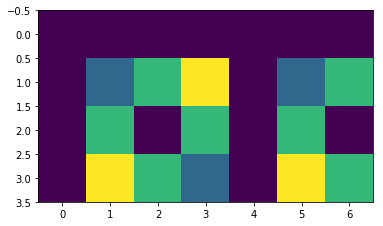

In [87]:
imshow(f["DS1"])

Bővebb információt a HDF5 fájlok feldolgozásáról:

- [A h5py hivatalos dokumentációja](http://docs.h5py.org/en/latest/quick.html)
- [A HDF csoport honlapja](https://www.hdfgroup.org/)
- [HDF5 tutorils](http://neondataskills.org/HDF5/)

## [Fits](https://fits.gsfc.nasa.gov/fits_primer.html) fájlok (Flexible Image Transport System)

A fits a modern csillagászat legelterjetteb képformátuma. A fits képeknek nemcsak az a célja, hogy eltárolja a képi információt, hanem egyéb, a további feldolgozás szempontjából nélkülözhetetlen adatot is megőrizzen, mint amilyen az eszköz beállításai, a pontos idő stb.

A fits állományoknak alapvetően 2 fő része van. Az egyik a fejléc, ami a kép elemezéséhez szolgáló információkat tárolja, míg a másik a ténylegesen megfigyelt adatsor. Általában 2 dimenziós tömbök tárolódnak adatokként (amit a távcsőre szerelt CCD kamerák látnak), de van lehetőség több (maximum 999) dimenziós adattárolásra is.

Ebből a két fő részegységből szegmensek építhetőek, és összefűzhetőek 1 fits állományba. Ezeket a szegmenseket hívjuk, HDU-nak (Header/Data Units). Egy fits állomány több HDU-ból is állhat. Például 1 kép tárolhatja a különböző szűrőkkel készített felvételeket.


<img src=http://www.stsci.edu/hst/cos/documents/handbooks/datahandbook/images/ch2_cos_data5.02.jpg></img>




Szokás az első hdu-t az elsődleges (Primary), majd a többi hdu-t a kiterjesztett (Extend) jelzővel illetni. Ez azt is jelenti, hogy alapértelmezésben mindig a legelső fejléc és adattábla van használatban. 

A fits képekben 3 féle adattábla lehetséges:
- "IMAGE": Több dimenziós kép információ
- "TABLE": Emberi szem számára olvasható formátumú (ASCII) tábla
- "BINTABLE": Binárisan (számunkra nem olvasható) tárolt többdimenziós adattábla. Ezen tárolási módban, az egyes cellákban is lehetőség van egy komplett tömb tárolására. Például egy 8*8-s tömb igazából 64 külön képet is tárolhat.

A fits fájlok feldolgozásához szükség van az astropy csomagra. Ebből a gigász modulból is az astropy.io kezeli a fits képeket. Illetve az astropy.wcs csomag lehetővé teszi a különböző koordinátarendszerek közötti átszámítást, így a képünket nem feltétlenül kell pixel-pixel módon ábrázolni.

In [75]:
#from astropy.io import fits
import astropy.io.fits as fits
#from astropy import wcs as wcs
import astropy.wcs as wcs

A mellékelt adatok közt található a `data/HorseHead.fits`. Ha megnézitek hagyományos szövegmegjelenítővel, mint amilyen a bash-ban a `cat` azt látjátok, hogy ez egy többnyire olvashatlan bináris állomány:

In [76]:
! cat data/HorseHead.fits | head -n 2 | tail -1

!�!�#�#�$�'"'"$g#P$!&P((%�$�%\'�'�&s'�&s$�%�(�+(\&-#�%$�$�%9$!$�$�"�$�'"&
cat: write error: Broken pipe


Az astropy csomag `fits.open` parancsával lehet betölteni az állományt:

In [88]:
hdu=fits.open('data/HorseHead.fits')

Ennek a betöltött adatsornak több tulajdonsága is van. Az egyik ilyen, hogy megnézhetjük a benne levő HDU-kat. Ez esetben 2 szegmense is van a képnek.

In [78]:
hdu.info()

Filename: data/HorseHead.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Ha kiválasztunk egy szegmenst, akkor lehetőség van megnézni a fejléc tartalmát a `header` opcióval. Jól látszik, hogy mennyi minden bele van írva a fejlécbe.

In [79]:
len(hdu[0].header)

161

In [80]:
hdu[0].header[:10] # Ez csak az első 10 sor a header-ből

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               

Magát a képi információt a `data` opcióval lehet kiolvasni a szegmensből. Ez egy már ismerős numpy array.

In [81]:
image=hdu[0].data
image.shape

(893, 891)

In [82]:
image

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ..., 
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

A csillagészatban használ fits állományok nagy előnye, hogy a képi információ mellet a fejléc olyan fontos információkat is tartalmaz, mint kép készítésének körülményei, illetve a kép pontos égi koordináták szerinti helyzetéről is vannak adatok. Ezeket a koordináta adatokat a `wcs.WCS` paranccsal listázhatjuk ki.

In [83]:
kord=wcs.WCS(hdu[0].header)
kord

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.599416666666656  -4.9466388888888888  
CRPIX : -716.333144294269  -8444.6494669822605  
PC1_1 PC1_2  : 0.015029018460682027  -9.6373577765719806e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

A koordinátainformációk birtokában lehetőségünk van olyan ábrát készíteni, aminek tengelyei az égi koordinátatengellyel egyeznek meg, így leolvasható a kép adott részének égi pozíciója.

Először készítsük el azt a "box"-ot, amibe a képet bele fogjuk helyezni, ez analóg módon történik a 3D-s ábrák rajzolásával:

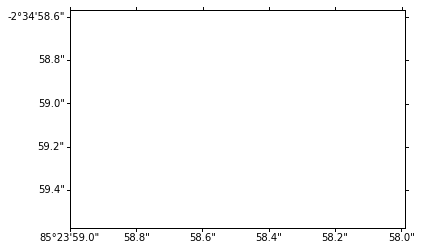

In [84]:
subplot(111,projection=kord) # így mondjuk meg a matplotlib-nek hogy a égi koordinátákat használja

Végül töltsük fel a box-ot a képi információval.

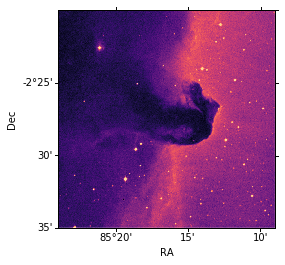

In [85]:
subplot(111,projection=kord) 
plt.imshow(image, cmap="magma", origin='lower')
plt.xlabel('RA')
plt.ylabel('Dec')